In [1]:
%cd ../../src

from brane_web import BraneWeb
import numpy as np

/Users/carl/Desktop/magnetic_quivers/src


#### Generating function for the brane web

In [2]:
def generate_braneweb(k1, k2, k3, k4, p, q):
    assert k3 >= k2, f'k3 = {k3} needs to be greater or equal to k2 = {k2}'
    assert p > 0, f'p = {p} needs to be greater than 0'
    assert k2 - k1 - p > k3 - k2, f'k2 - k1 - p = {k2 - k1 - p} needs to be greater than k3 - k2 = {k3-k2}'
    assert q > 0, f'q = {q} needs to be greater than 0'
    assert k4 + q - k3 < k3 - k2, f'k4 + q - k3 = {k4 + q - k3} needs to be less than k3 - k2 = {k3 - k2}'

    braneweb = BraneWeb()

    # Linear 7-branes on the left-hand side
    for i in range(k1):
        braneweb.add_seven_brane(f's{i+1}', position=(-(k1 - i), 0))


    # Linear 7-branes on the right-hand side
    for i in range(k4):
        braneweb.add_seven_brane(f's{k1+i+1}', position=(i+1, 0))


    # Junction
    braneweb.add_junction('j', position=(0,0))


    # top seven branes
    position_st1 = np.array(
        [-(k2 - k1 - p), 1]
    )
    #length_st1 = np.linalg.norm(position_st1)
    #position_st1 = 1.5 * position_st1 / length_st1

    position_st2 = np.array(
        [-(k3 - k2), 1]
    )
    #length_st2 = np.linalg.norm(position_st2)
    #position_st2 = 1.5 * position_st2 / length_st2

    if k3 > k4 + q:
        position_st3 = np.array(
            [k3 - k4 - q, 1]
        )
    else:
        position_st3 = np.array(
            [k4 + q - k3, 1]
        )
    #length_st3 = np.linalg.norm(position_st3)
    #position_st3 = 1.5 * position_st3 / length_st3

    braneweb.add_seven_brane(
        'st1', 
        position=position_st1
    )

    braneweb.add_seven_brane(
        'st2',
        position=position_st2
    )

    braneweb.add_seven_brane(
        'st3',
        position=position_st3
    )

    # bottom seven branes

    position_sb1 = np.array(
        [-p, -1]
    )
    #length_sb1 = np.linalg.norm(position_sb1)
    #position_sb1 = 1.5 * position_sb1 / length_sb1

    position_sb3 = np.array(
        [q, -1]
    )
    #length_sb3 = np.linalg.norm(position_sb3)
    #position_sb3 = 1.5 * position_sb3 / length_sb3

    braneweb.add_seven_brane(
        'sb1',
        position=position_sb1
    )

    braneweb.add_seven_brane(
        'sb2',
        position=[0,-1]
    )

    braneweb.add_seven_brane(
        'sb3',
        position=position_sb3
    )

    # 5 branes
    for i in range(k1-1):
        braneweb.add_brane(f's{i+1}', f's{i+2}', multiplicity=i+1)

    if k1 > 0:
        braneweb.add_brane(f's{k1}', 'j', multiplicity=k1)
    if k4 > 0:
        braneweb.add_brane('j', f's{k1+1}', multiplicity=k4)

    for i in range(k4-1):
        braneweb.add_brane(f's{k1+1+i}', f's{k1+2+i}', multiplicity=k4-i-1)

    braneweb.add_brane('st1', 'j', multiplicity=1)
    braneweb.add_brane('st2', 'j', multiplicity=1)
    braneweb.add_brane('st3', 'j', multiplicity=1)

    braneweb.add_brane('sb1', 'j', multiplicity=1)
    braneweb.add_brane('sb2', 'j', multiplicity=1)
    braneweb.add_brane('sb3', 'j', multiplicity=1)



    return braneweb

def possible_k1s(k2, k3):
    return [i for i in range(2 * k2 - k3 - 1)]

def possible_k4s(k2, k3):
    return [i for i in range(2 * k3 - k2 - 1)]

def possible_ps(k1, k2, k3):
    return [i for i in range(1, 2 * k2 - k1 - k3)]

def possible_qs(k2, k3, k4):
    return [i for i in range(1, 2 * k3 - k2 - k4)]

def cs_level1(k1, k2, k3, p):
    pass

def cs_level2():
    pass

#### analysis

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 0 1 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


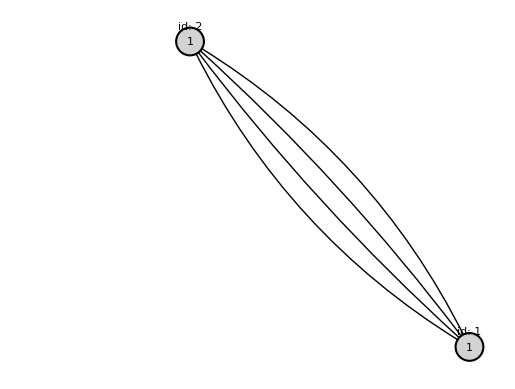

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 0 1 2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


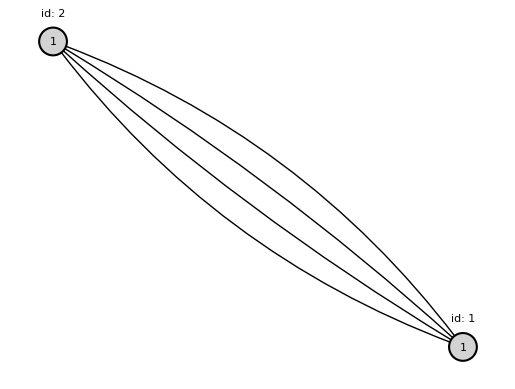

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 0 1 3
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


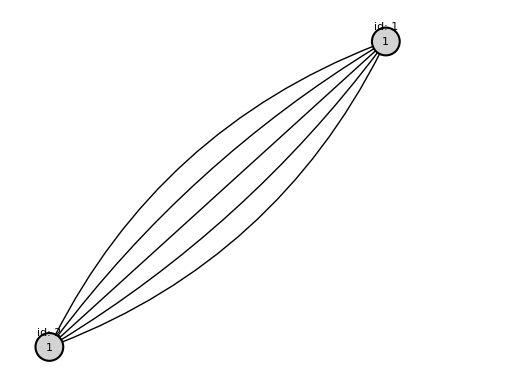

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 0 1 4
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


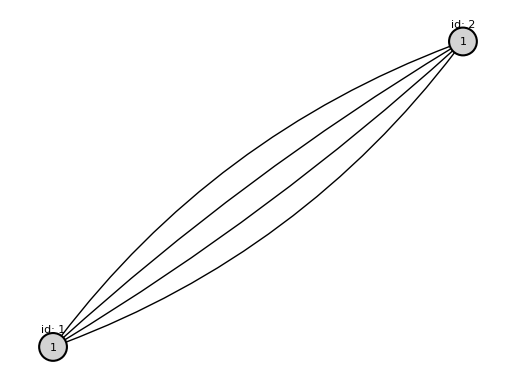

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 1 1 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


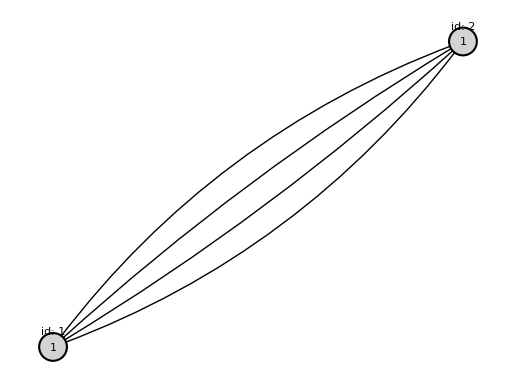

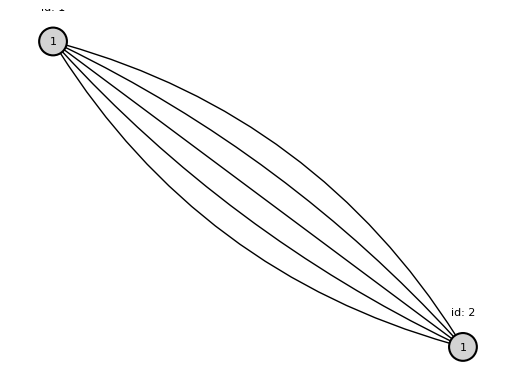

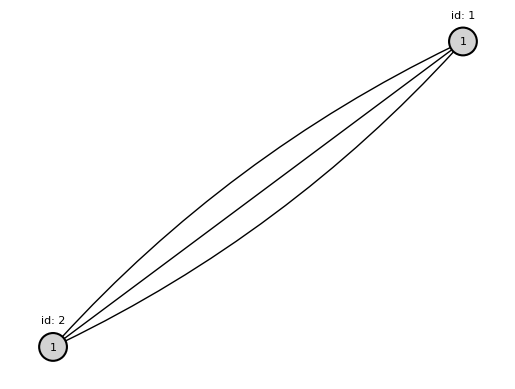

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 1 1 2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


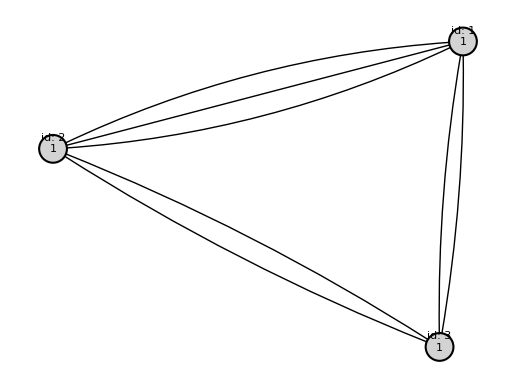

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 1 1 3
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


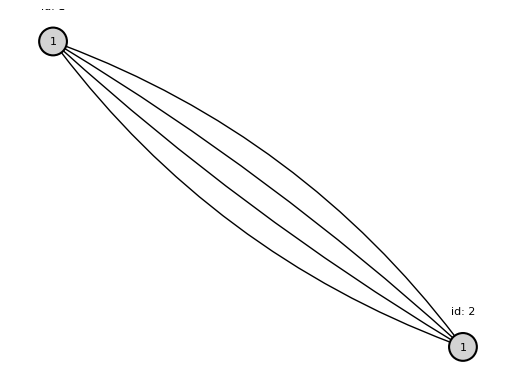

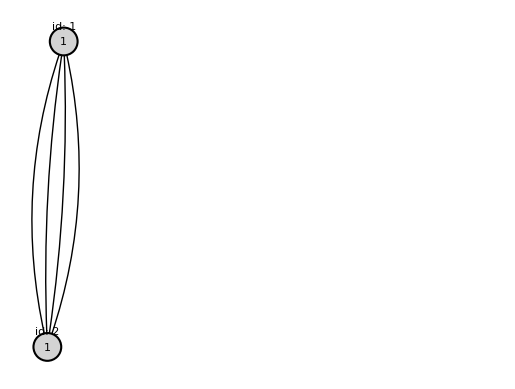

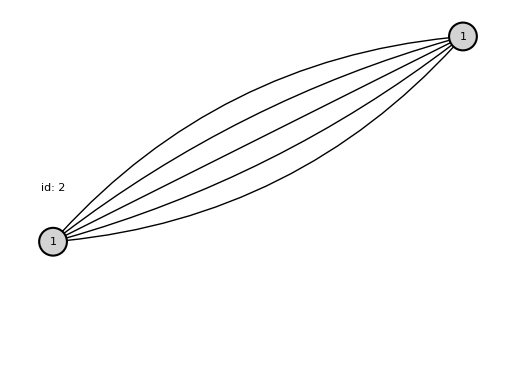

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 2 1 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


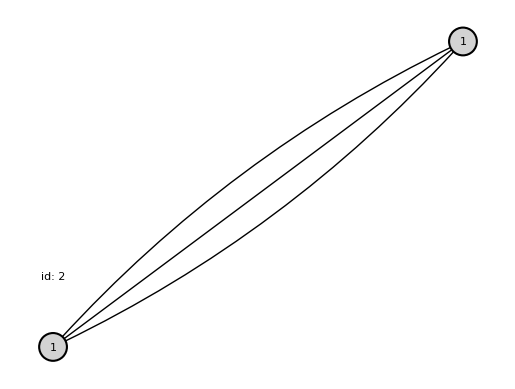

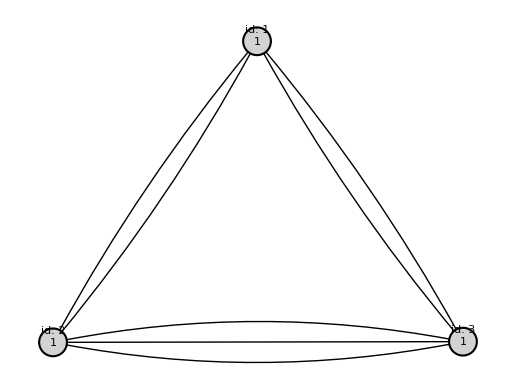

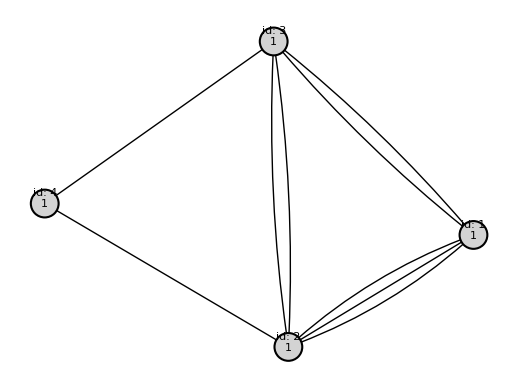

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 2 1 2
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


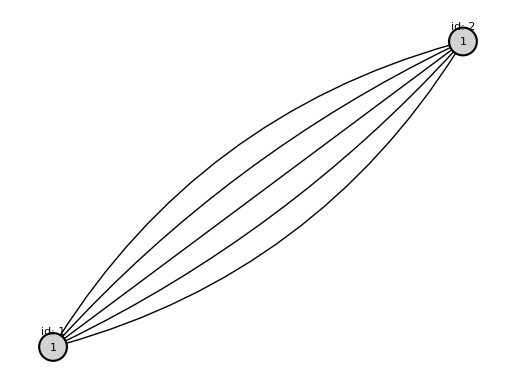

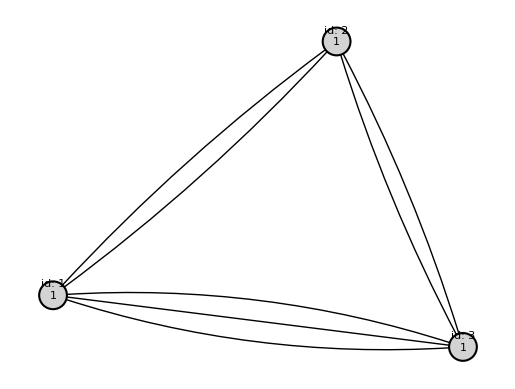

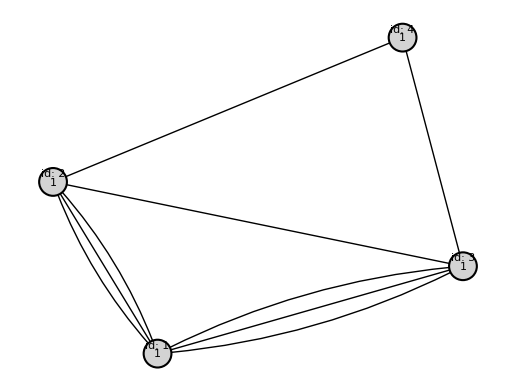

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Current Parameters: k2, k3, k1, k4, p, q = 3 4 0 3 1 1
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


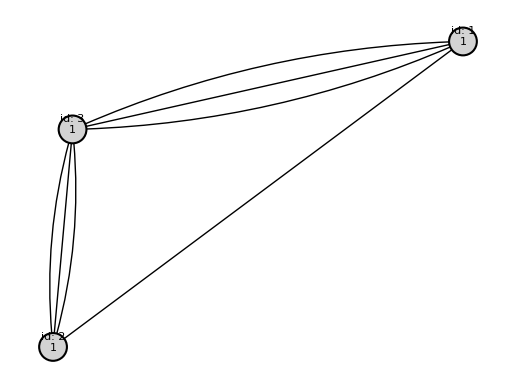

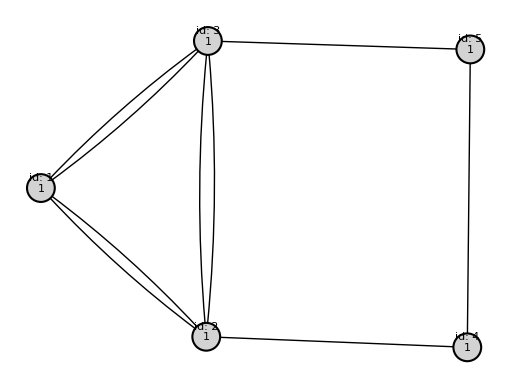

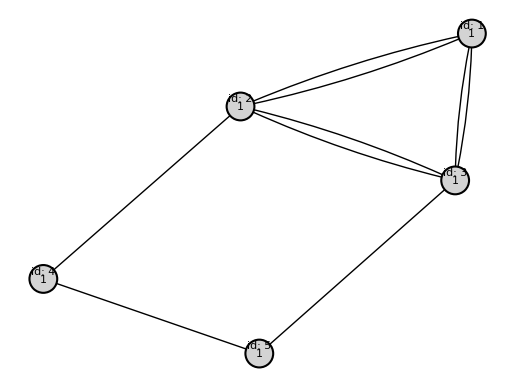

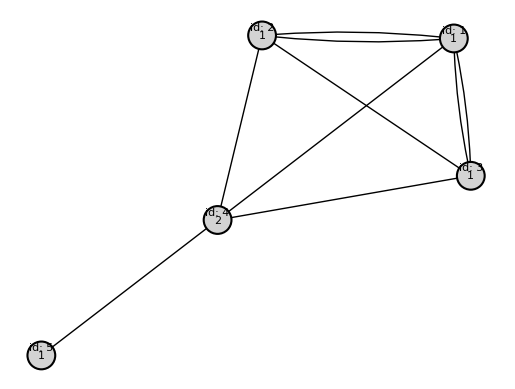

In [3]:
k2, k3 = 3, 4

for k1 in possible_k1s(k2, k3):
    for k4 in possible_k4s(k2, k3):
        for p in possible_ps(k1, k2, k3):
            for q in possible_qs(k2, k3, k4):

                print('-'*200)
                print(f'Current Parameters: k2, k3, k1, k4, p, q = {k2} {k3} {k1} {k4} {p} {q}')
                print('-'*200)

                braneweb = generate_braneweb(k1, k2, k3, k4, p, q)
                #braneweb.draw()


                magnetic_quivers = braneweb.magnetic_quivers()
                for i, quiver in enumerate(magnetic_quivers):
                    quiver.draw()
